In [1]:
import os
import sys

from dotenv import load_dotenv

module_path = os.path.abspath(os.path.join("../src"))
if module_path not in sys.path:
    sys.path.append(module_path)

load_dotenv()

True

In [2]:
from linkedin_api import Linkedin

from utils.config import get_env

env = get_env()
api = Linkedin(
    env.linkedin_username.get_secret_value(), env.linkedin_password.get_secret_value()
)
jobs = api.search_jobs(
    keywords="frontend",
    location="Germany",
    limit=10,
)


In [3]:
print(jobs)

[{'trackingUrn': 'urn:li:jobPosting:4128300973', 'repostedJob': False, 'title': 'AI Solutions Consultant', '$recipeTypes': ['com.linkedin.deco.recipe.anonymous.Anon1578943416'], 'posterId': '10726136', '$type': 'com.linkedin.voyager.dash.jobs.JobPosting', 'contentSource': 'JOBS_PREMIUM_OFFLINE', 'entityUrn': 'urn:li:fsd_jobPosting:4128300973'}, {'trackingUrn': 'urn:li:jobPosting:4128925433', 'repostedJob': False, 'title': 'Senior DevOps Engineer', '$recipeTypes': ['com.linkedin.deco.recipe.anonymous.Anon1578943416'], 'posterId': '825072968', '$type': 'com.linkedin.voyager.dash.jobs.JobPosting', 'contentSource': 'JOBS_PREMIUM_OFFLINE', 'entityUrn': 'urn:li:fsd_jobPosting:4128925433'}, {'trackingUrn': 'urn:li:jobPosting:4128307245', 'repostedJob': False, 'title': 'AI Solutions Consultant', '$recipeTypes': ['com.linkedin.deco.recipe.anonymous.Anon1578943416'], 'posterId': '10726136', '$type': 'com.linkedin.voyager.dash.jobs.JobPosting', 'contentSource': 'JOBS_PREMIUM_OFFLINE', 'entityUrn'

In [4]:
job_details = api.get_job("4128300973")

In [5]:
job_details

{'dashEntityUrn': 'urn:li:fsd_jobPosting:4128300973',
 'companyDetails': {'com.linkedin.voyager.deco.jobs.web.shared.WebCompactJobPostingCompany': {'companyResolutionResult': {'entityUrn': 'urn:li:fs_normalized_company:85309',
    'name': 'Prosperity Recruitment',
    'logo': {'image': {'com.linkedin.common.VectorImage': {'artifacts': [{'width': 200,
         'fileIdentifyingUrlPathSegment': '200_200/company-logo_200_200/0/1630619230639/prosperity_logo?e=1745452800&v=beta&t=wOKrMpUqbVvM4MQm98EYAZANXOrNetYRviQZh-b42MA',
         'expiresAt': 1745452800000,
         'height': 200},
        {'width': 100,
         'fileIdentifyingUrlPathSegment': '100_100/company-logo_100_100/0/1630619230639/prosperity_logo?e=1745452800&v=beta&t=2565i_SKlHOgU7luWxrLcuoQq9LAUKY-0L8Lii0Wfy8',
         'expiresAt': 1745452800000,
         'height': 100},
        {'width': 400,
         'fileIdentifyingUrlPathSegment': '400_400/company-logo_400_400/0/1630619230639/prosperity_logo?e=1745452800&v=beta&t=C924p-9

In [2]:
from pipelines.jobs import JobSearchPipelineGenerator

pipeline = JobSearchPipelineGenerator().generate()

pipeline.inputs()

/home/rsantos/projects/job-search-buddy/.venv/lib/python3.12/site-packages/bs4/builder/_lxml.py:124: DeprecationWarning: The 'strip_cdata' option of HTMLParser() has never done anything and will eventually be removed.
  parser = parser(


{'cv_loader': {'cv_file_path': {'type': typing.Annotated[pathlib.Path, PathType(path_type='file')],
   'is_mandatory': True},
  'cv_file_name': {'type': str, 'is_mandatory': True}},
 'listings_scanner': {'keywords': {'type': list[str], 'is_mandatory': True},
  'location': {'type': str, 'is_mandatory': True}}}

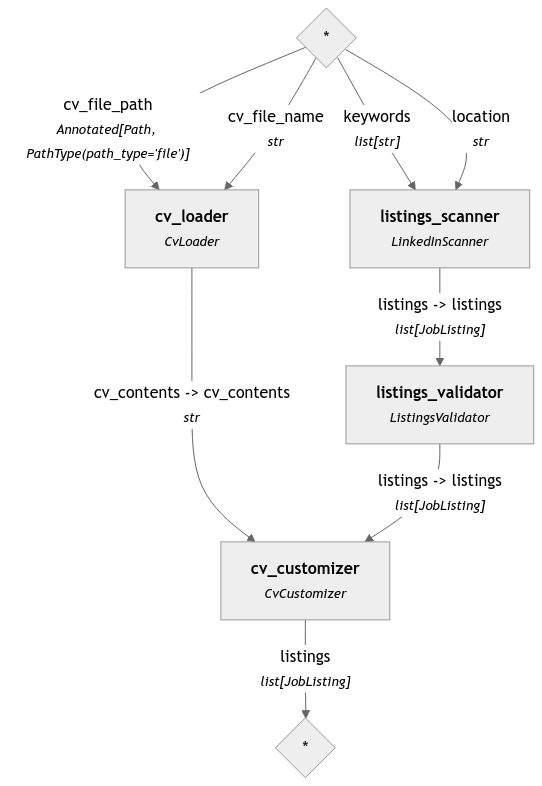

In [3]:
pipeline.show()

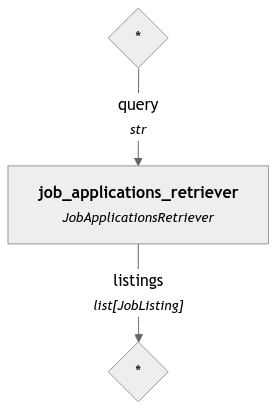

INFO: Running component job_applications_retriever


WeaviateQueryError: Query call with protocol GRPC search failed with message <AioRpcError of RPC that terminated with:
	status = StatusCode.UNKNOWN
	details = "remote client vectorize: connection to Mistral failed with status: 429 error: Requests rate limit exceeded"
	debug_error_string = "UNKNOWN:Error received from peer  {created_time:"2025-01-19T04:22:28.836484152+01:00", grpc_status:2, grpc_message:"remote client vectorize: connection to Mistral failed with status: 429 error: Requests rate limit exceeded"}"
>.

In [2]:
from tools.jobs import JobApplicationsSearch

pipeline = JobApplicationsSearch().generate_pipeline()
pipeline.inputs()
pipeline.show()

pipeline.run({"query": "frontend"})
